<a href="https://colab.research.google.com/github/user123288/Image-classification-of-cats-and-dogs/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Information


The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip

(1=dog, 0=cat)


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-09-25 13:39:25--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.44.74.17, 2600:1406:5600:689::317f, 2600:1406:5600:68c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.44.74.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   134MB/s    in 6.9s    

2025-09-25 13:39:32 (114 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [ ]:
input_path = []
label = []
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/8450.jpg 0


In [ ]:
print(input_path[10], label[10])

PetImages/Cat/4143.jpg 0


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/4331.jpg      0
1   PetImages/Cat/6236.jpg      0
2  PetImages/Dog/11668.jpg      1
3   PetImages/Dog/2201.jpg      1
4  PetImages/Dog/10224.jpg      1

In [ ]:
# delete db files
for i in df['images']:
  if '.jpg' not in i:
    print(i)


PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [ ]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

## Exploratory Data Analysis

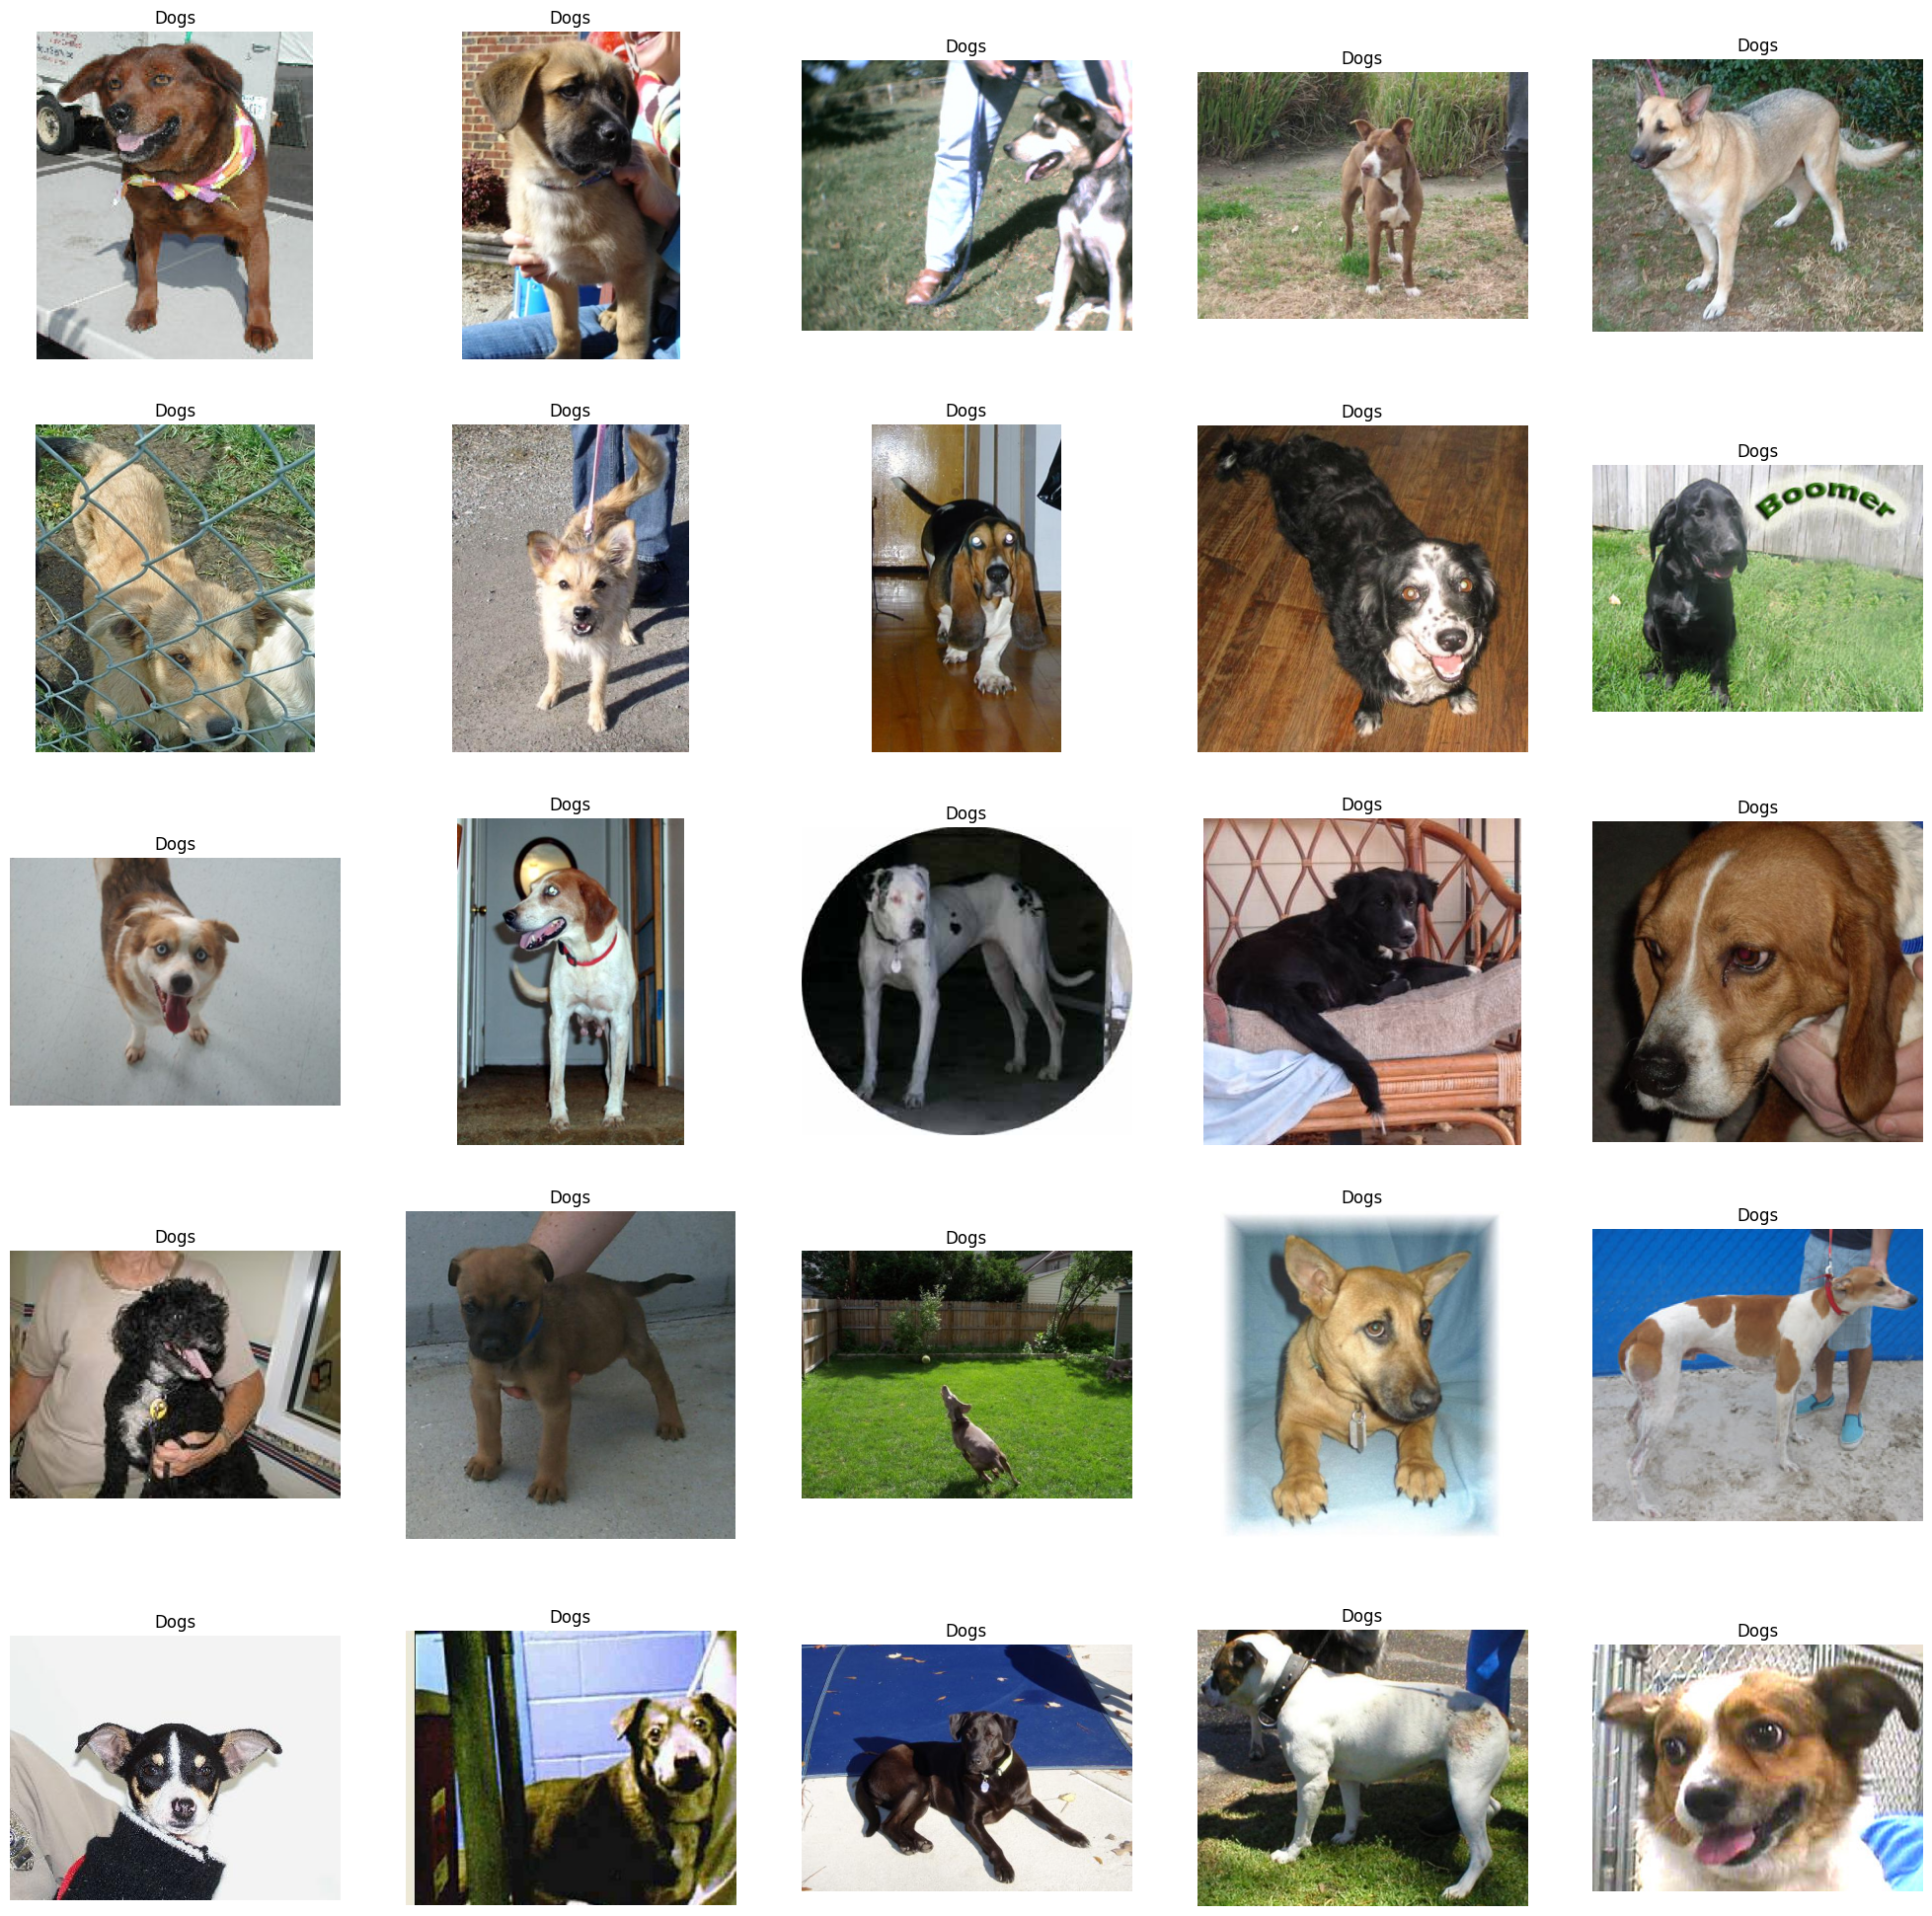

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

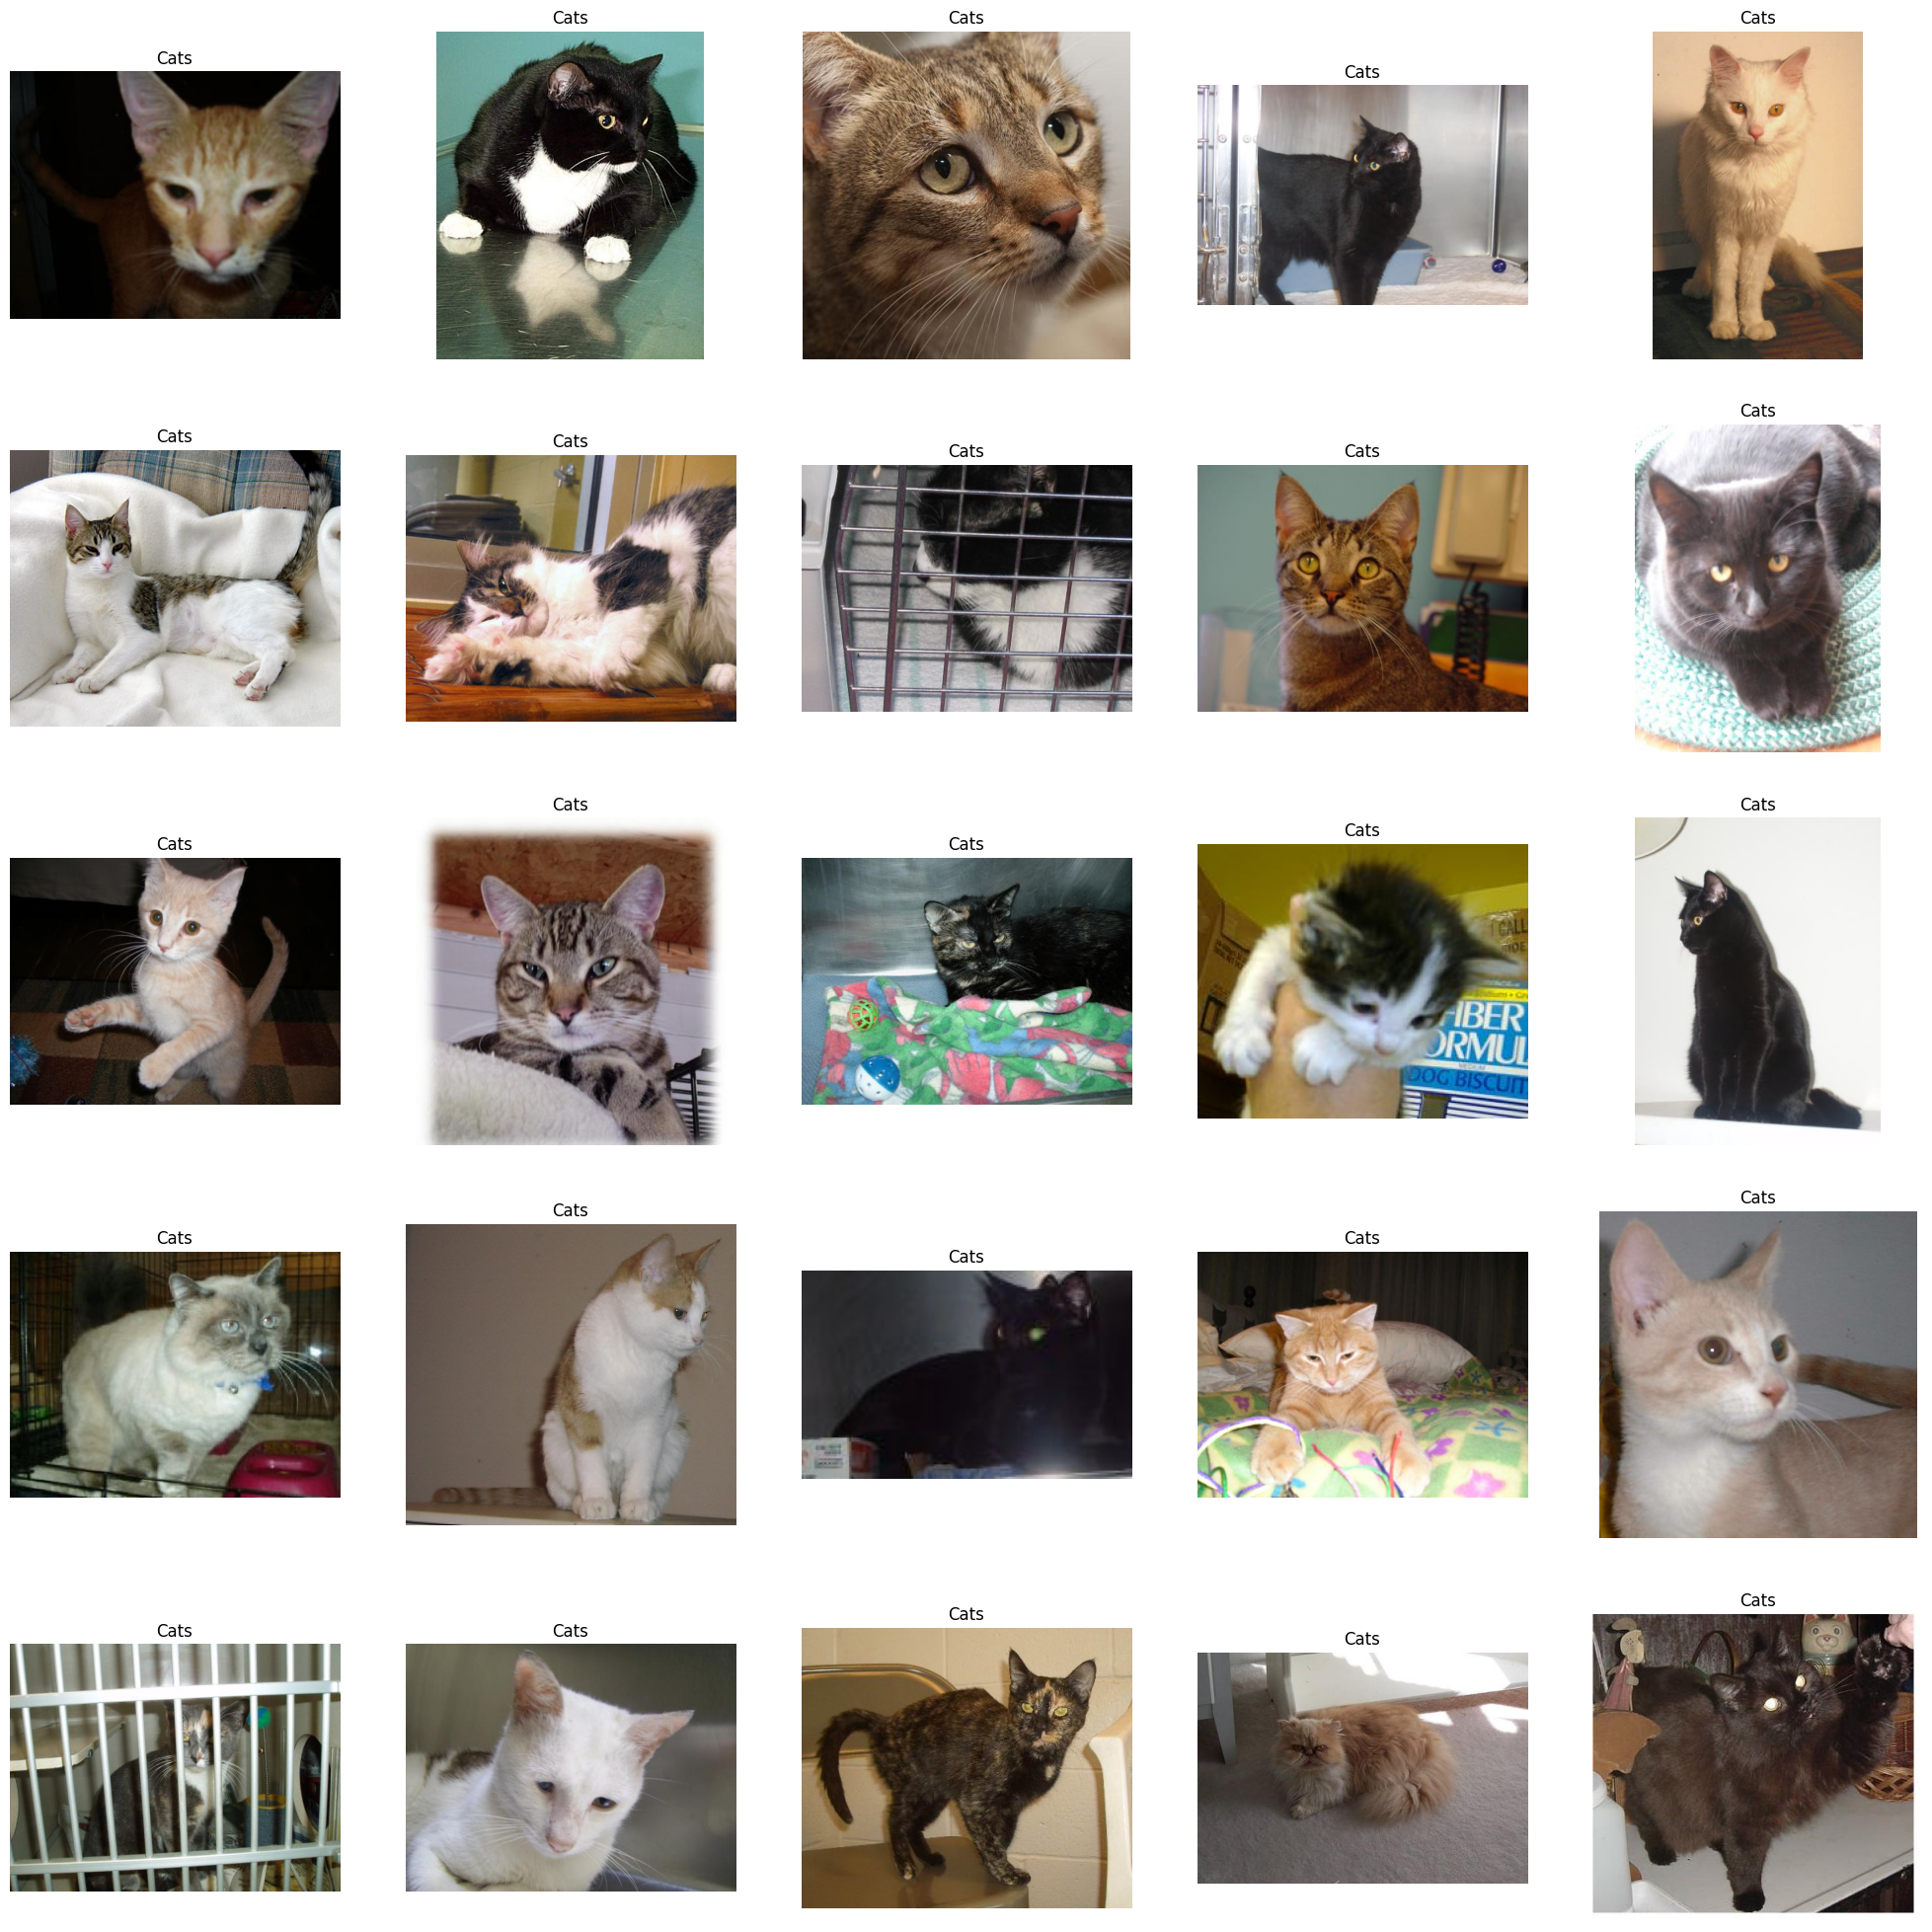

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

In [ ]:
import seaborn as sns


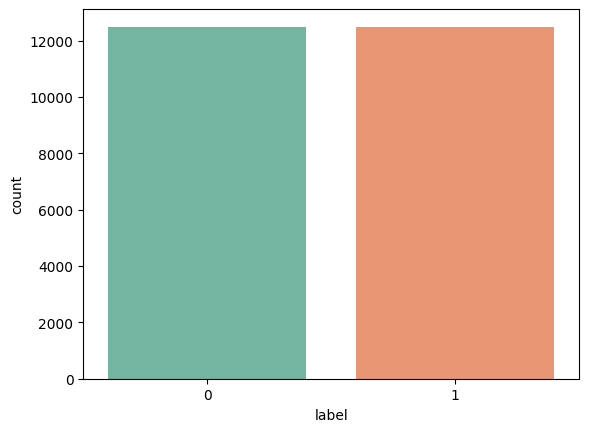

In [ ]:
sns.countplot(x='label', data=df, palette='Set2')
plt.show()

## Create DataGenerator for the Images

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

images label
0   PetImages/Cat/4331.jpg     0
1   PetImages/Cat/6236.jpg     0
2  PetImages/Dog/11668.jpg     1
3   PetImages/Dog/2201.jpg     1
4  PetImages/Dog/10224.jpg     1

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state= 42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_geneartor = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col = 'images',
    y_col = 'label',
    target_size=(128,128),
    batch_size=256,
    class_mode = 'binary'

)

val_iterator = val_geneartor.flow_from_dataframe(
    test,
    x_col = 'images',
    y_col = 'label',
    target_size=(128,128),
    batch_size=256,
    class_mode = 'binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPooling2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')

])




In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.5294 - loss: 0.7506 - val_accuracy: 0.6458 - val_loss: 0.6421
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step - accuracy: 0.6565 - loss: 0.6227 - val_accuracy: 0.7182 - val_loss: 0.5542
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.7168 - loss: 0.5545 - val_accuracy: 0.7422 - val_loss: 0.5185
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.7275 - loss: 0.5280 - val_accuracy: 0.7530 - val_loss: 0.4966
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 434s 5s/step - accuracy: 0.7591 - loss: 0.4964 - val_accuracy: 0.7794 - val_loss: 0.4627
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.7775 - loss: 0.4616 - val_accuracy: 0.7936 - val_loss: 0.4466
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 429s 5s/step - accuracy: 0.7858 - loss: 0.4545 - val_accuracy: 0.8078 - val_loss: 0.4154
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.7990 - loss: 0.4357 - val_accuracy: 0.8062 - v

## Visualization of Results

<Figure size 640x480 with 0 Axes>

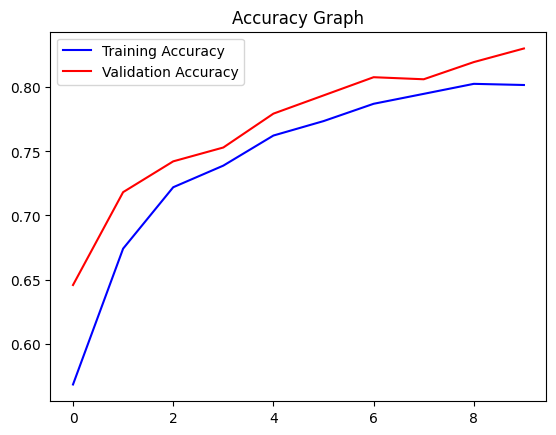

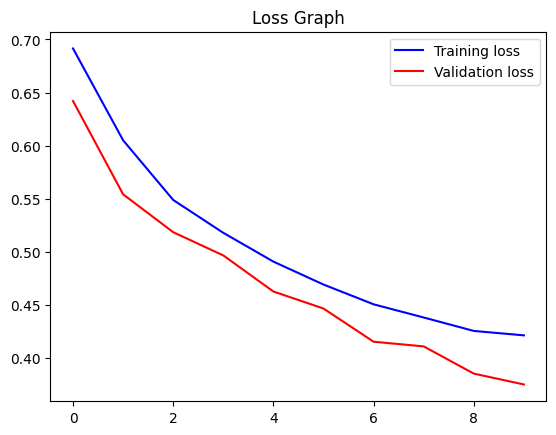

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss= history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()


In [3]:
import gradio as gr

In [4]:
def predict_image(img):
  img_3d = img.reshape(-1,128,128, 3)
  prediction = model.predict(img_3d)[0]
  return {class_name[i]: float(prediction[i])for i in range(2)}

In [10]:
image =gr.Image()
label= gr.Label(num_top_classes= 2)

gr.Interface(fn=predict_image, inputs=image, outputs=label).launch(debug='True')

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d501018918222f1ef5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d501018918222f1ef5.gradio.live
